In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import time
from tensorflow import keras
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import os
import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical 
from sklearn.model_selection import train_test_split
from keras.models import Model
# from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Lambda
from keras.layers.core import Dense
# from keras.optimizers import SGD
from keras.layers import Flatten
from keras.layers import Input
import tensorflow as tf
from sklearn import datasets 
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [ ]:
os.mkdir('results')

# Helper Functions

In [ ]:
def split_X_y(data):
  X = data.drop('H/A',axis = 1)
  X = X.drop('W/A',axis = 1)
  X = X.drop('W/H',axis = 1)
  X = X.drop('Bmi',axis = 1)
  X = X.drop('HAWH',axis = 1)
  y1 = data['W/A']
  y2 = data['H/A']
  y3 = data['W/H']
  y4 = data['Bmi']
  y5 = data['HAWH']
  y1 = y1.to_frame()  # convert y outputs from series to dataframe
  y2 = y2.to_frame()
  y3 = y3.to_frame()
  y4 = y4.to_frame()
  print(X.shape, 'X shape')
  print(y1.shape, 'y1 shape')
  print(y2.shape, 'y2 shape')
  print(y3.shape, 'y3 shape')
  print(y4.shape, 'y4 shape')
  print(y5.shape, 'y5 shape')
  return X, y1, y2, y3, y4, y5

In [ ]:
def norm(data):
  _data = pd.DataFrame(columns=data.columns)
  for c in data.columns:           #Normalization of Data
    min = data[c].min()
    max = data[c].max()
    _data[c] = (data[c] - min)/(max - min)
    # _data = data
  print(_data.head())
  return _data


In [ ]:
def get_accuracy(pred, y_test):
  a = np.argmax(pred, axis = 1)
  accuracy = []
  count = 0
  for i,c in enumerate(y_test):
    if c == a[i]:
      accuracy.append(1)
      count += 1
    else:
      accuracy.append(0)
  print('accuracy', count/len(accuracy))
  return count/len(accuracy)

# Data Load and Preprocessing
###  df = original dataframe
### dfl = label encoded dataframe
### dfd = dummies dataframe


### df 

In [ ]:
df = pd.read_csv('New_Dataset_15-16.csv')

In [ ]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

In [ ]:
df

,State,Area,Religion,caste,mothers education,source of water,toilet facility,no of members,no of living children,mothers age(at first birth),sex of household head,wealth index,initiaion of bf,sex of child,months of bf,mothers bmi,child's age,index to birth history,birth weight,history of illness,Exposure to mass media,dietary score,immunization,H/A,W/A,W/H,Bmi,HAWH
0,East_India,Urban,Hindu,Others,Secondary education,Improved,Improved,4,1,20-29,Male,Richer,Early Initiation,Female,>24,healthy,48-60,1,2.5+,Yes,Yes,0,fully immunized,0,0,0,0,0
1,East_India,Urban,Hindu,OBC,Higher education,Improved,Improved,3,1,20-29,Male,Richer,Late Initiation,Female,<24,overweight,24-36,1,2.5+,No,Yes,0,fully immunized,0,0,0,0,0
2,East_India,Rural,Christian,ST,Secondary education,Improved,Improved,6,2,20-29,Male,Middle,Early Initiation,Female,<24,healthy,6-,1,2.5+,No,Yes,4,unimmunized,0,0,0,0,0
3,East_India,Rural,Christian,ST,Secondary education,Improved,Improved,6,3,20-29,Male,Richest,Early Initiation,Male,<24,healthy,6-12,1,2.5+,No,Yes,3,unimmunized,0,0,0,0,0
4,East_India,Rural,Christian,ST,Secondary education,Improved,Improved,5,2,20-29,Female,Middle,Early Initiation,Female,<24,healthy,24-36,1,2.5+,No,Yes,0,unimmunized,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172617,South_India,Urban,Hindu,OBC,Higher education,Improved,Improved,4,1,20-29,Male,Richest,Early Initiation,Female,<24,overweight,24-36,1,2.5+,No,Yes,0,fully immunized,0,0,0,0,0
172618,South_India,Urban,Hindu,OBC,Secondary education,Improved,Improved,4,2,<20,Male,Richest,Early Initiation,Female,<24,overweight,48-60,1,2.5+,No,Yes,0,fully immunized,0,0,0,0,0
172619,South_India,Rural,Hindu,OBC,Secondary education,Improved,Improved,3,1,<20,Male,Middle,Late Initiation,Male,<24,underweight,6-12,1,2.5+,Yes,Yes,1,partially immunized,0,0,0,0,0
172620,South_India,Rural,Hindu,OBC,Secondary education,Unimproved,Unimproved,8,1,<20,Male,Richer,Late Initiation,Male,<24,healthy,6-,1,2.5-,No,Yes,0,partially immunized,0,1,1,1,0


In [ ]:
print(df.isnull().sum())
print(df.shape)

State                          0
Area                           0
Religion                       0
caste                          0
mothers education              0
source of water                0
toilet facility                0
no of members                  0
no of living children          0
mothers age(at first birth)    0
sex of household head          0
wealth index                   0
initiaion of bf                0
sex of child                   0
months of bf                   0
mothers bmi                    0
child's age                    0
index to birth history         0
birth weight                   0
history of illness             0
Exposure to mass media         0
dietary score                  0
immunization                   0
H/A                            0
W/A                            0
W/H                            0
Bmi                            0
HAWH                           0
dtype: int64
(172622, 28)


### dfl

In [ ]:
dfl = pd.DataFrame()

In [ ]:
label_encoder = preprocessing.LabelEncoder()
dfl = df.apply(label_encoder.fit_transform)
# dfl['state']= label_encoder.fit_transform(df['state'])
# dfl['area']= label_encoder.fit_transform(df['area'])
# dfl['religion']= label_encoder.fit_transform(df['religion'])
# dfl['caste']= label_encoder.fit_transform(df['caste'])
# dfl['father\'s education']= label_encoder.fit_transform(df['father\'s education'])
# dfl['father\'s occupation']= label_encoder.fit_transform(df['father\'s occupation'])
# dfl['mother\'s education']= label_encoder.fit_transform(df['mother\'s education'])
# dfl['mother\'s occupation']= label_encoder.fit_transform(df['mother\'s occupation'])
# dfl['exposure to mass media']= label_encoder.fit_transform(df['exposure to mass media'])
# dfl['Source of drinking water']= label_encoder.fit_transform(df['Source of drinking water'])
# dfl['Toilet Facility'] = label_encoder.fit_transform(df['Toilet Facility'])
# dfl['mother\'s age']= label_encoder.fit_transform(df['mother\'s age'])
# dfl['mother\'s bmi']= label_encoder.fit_transform(df['mother\'s bmi'])
# dfl['child\'s age']= label_encoder.fit_transform(df['child\'s age'])
# dfl['sex of child']= label_encoder.fit_transform(df['sex of child'])
# dfl['birth weight']= label_encoder.fit_transform(df['birth weight'])
# dfl['initiation of bf(early initiation)']= label_encoder.fit_transform(df['initiation of bf(early initiation)'])
# dfl['wealth index']= label_encoder.fit_transform(df['wealth index'])
# dfl['months of bf']= label_encoder.fit_transform(df['months of bf'])
# dfl['immunization']= label_encoder.fit_transform(df['immunization'])
# dfl['sex of household head']= label_encoder.fit_transform(df['sex of household head'])
# dfl['H/A'] = df['H/A']
# dfl['W/A'] = df['W/A']
# dfl['W/H'] = df['W/H']
# dfl['Bmi'] = df['Bmi']
# dfl['HAWH'] = df['HAWH']
# dfl['history of illness'] = df['history of illness']
# dfl['index to birth history'] = df['index to birth history']
# dfl['no of living children'] = df['no of living children']
# dfl['dietary score'] = df['dietary score']
# dfl['total family members'] = df['total family members']
# dfl['type of family'] = df['type of family']

In [ ]:
dfl

,State,Area,Religion,caste,mothers education,source of water,toilet facility,no of members,no of living children,mothers age(at first birth),sex of household head,wealth index,initiaion of bf,sex of child,months of bf,mothers bmi,child's age,index to birth history,birth weight,history of illness,Exposure to mass media,dietary score,immunization,H/A,W/A,W/H,Bmi,HAWH
0,1,1,1,1,3,0,0,2,0,0,1,3,0,0,1,0,4,0,0,1,1,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,1,0,0,1,3,1,0,0,1,2,0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,3,3,0,0,4,1,0,1,0,0,0,0,0,5,0,0,0,1,4,2,0,0,0,0,0
3,1,0,0,3,3,0,0,4,2,0,1,4,0,1,0,0,6,0,0,0,1,3,2,0,0,0,0,0
4,1,0,0,3,3,0,0,3,1,0,0,0,0,0,0,0,2,0,0,0,1,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172617,4,1,1,0,0,0,0,2,0,0,1,4,0,0,0,1,2,0,0,0,1,0,0,0,0,0,0,0
172618,4,1,1,0,3,0,0,2,1,3,1,4,0,0,0,1,4,0,0,0,1,0,0,0,0,0,0,0
172619,4,0,1,0,3,0,0,1,0,3,1,0,1,1,0,2,6,0,0,1,1,1,1,0,0,0,0,0
172620,4,0,1,0,3,1,1,6,0,3,1,3,1,1,0,0,5,0,1,0,1,0,1,0,1,1,1,0


### dfd

In [ ]:
dfd = pd.get_dummies(df)

In [ ]:
dfd

,no of members,no of living children,index to birth history,dietary score,H/A,W/A,W/H,Bmi,HAWH,State_Central_India,State_East_India,State_NorthEast_India,State_North_India,State_South_India,State_West_India,Area_Rural,Area_Urban,Religion_Christian,Religion_Hindu,Religion_Muslim,Religion_Others,Religion_Sikh,caste_OBC,caste_Others,caste_SC,caste_ST,mothers education_Higher education,mothers education_No education,mothers education_Primary education,mothers education_Secondary education,source of water_Improved,source of water_Unimproved,toilet facility_Improved,toilet facility_Unimproved,mothers age(at first birth)_20-29,mothers age(at first birth)_30-39,mothers age(at first birth)_40 or above,mothers age(at first birth)_<20,sex of household head_Female,sex of household head_Male,wealth index_Middle,wealth index_Poorer,wealth index_Poorest,wealth index_Richer,wealth index_Richest,initiaion of bf_Early Initiation,initiaion of bf_Late Initiation,sex of child_Female,sex of child_Male,months of bf_<24,months of bf_>24,mothers bmi_healthy,mothers bmi_overweight,mothers bmi_underweight,child's age_12-18,child's age_18-24,child's age_24-36,child's age_36-48,child's age_48-60,child's age_6-,child's age_6-12,birth weight_2.5+,birth weight_2.5-,birth weight_not weighed at birth,history of illness_No,history of illness_Yes,Exposure to mass media_No,Exposure to mass media_Yes,immunization_fully immunized,immunization_partially immunized,immunization_unimmunized
0,4,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0
1,3,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0
2,6,2,1,4,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1
3,6,3,1,3,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1
4,5,2,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172617,4,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0
172618,4,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0
172619,3,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0
172620,8,1,1,0,0,1,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0


### dfh

In [ ]:
dfh = pd.DataFrame()

In [ ]:
dfh['State']= df['State']
# dfh['father\'s education']= df['father\'s education']
dfh['mothers education']= df['mothers education']
# dfh['mother\'s occupation']= df['mother\'s occupation']
dfh['mother\'s age']= df['mother\'s age']
dfh['mother\'s bmi']= df['mother\'s bmi']
dfh['child\'s age']= df['child\'s age']
dfh['birth weight']= df['birth weight']
dfh['wealth index']= df['wealth index']
dfh['months of bf']= df['months of bf']
dfh['immunization']= df['immunization']
dfh['H/A'] = df['H/A']
dfh['W/A'] = df['W/A']
dfh['W/H'] = df['W/H']
dfh['HAWH'] = df['HAWH']
dfh['Bmi'] = df['Bmi']
dfh['index to birth history'] = df['index to birth history']
dfh['no of living children'] = df['no of living children']
dfh['total family members'] = df['total family members']
dfh['type of family'] = df['type of family']


KeyError: ignored

In [ ]:
dfh.to_csv('Dataset_5-6_top15.csv')

In [ ]:
dfhd = pd.get_dummies(dfh)

## dfch

In [ ]:
dfch = pd.DataFrame()

In [ ]:
dfch['caste']= df['caste']
dfch['state']= df['state']
dfch['area']= df['area']
dfch['father\'s education']= df['father\'s education']
dfch['father\'s occupation']= df['father\'s occupation']
dfch['mother\'s education']= df['mother\'s education']
dfch['mother\'s occupation']= df['mother\'s occupation']
dfch['exposure to mass media']= df['exposure to mass media']
dfch['Toilet Facility'] = df['Toilet Facility']
dfch['mother\'s age']= df['mother\'s age']
dfch['mother\'s bmi']= df['mother\'s bmi']
dfch['child\'s age']= df['child\'s age']
dfch['birth weight']= df['birth weight']
dfch['wealth index']= df['wealth index']
dfch['H/A'] = df['H/A']
dfch['W/A'] = df['W/A']
dfch['W/H'] = df['W/H']
dfch['Bmi'] = df['Bmi']
dfch['HAWH'] = df['HAWH']
dfch['no of living children'] = df['no of living children']
dfch['immunization']= df['immunization']
dfch = dfch.drop(['type of family'], axis = 1)

KeyError: ignored

In [ ]:
dfch.shape

(38059, 20)

In [ ]:
dfch.to_csv('Dataset_5-6_chi16.csv')

In [ ]:
dfchd = pd.get_dummies(dfch)

In [ ]:
dfchd

,H/A,W/A,W/H,Bmi,no of living children,caste_OBC,caste_Others,caste_SC,caste_ST,father's education_Higher education,father's education_No education,father's education_Primary education,father's education_Secondary education,father's occupation_Rgri,father's occupation_clerical,father's occupation_professional,father's occupation_sales,father's occupation_services,father's occupation_skilled labour,father's occupation_unemployed,mother's education_Higher education,mother's education_No education,mother's education_Primary education,mother's education_Secondary education,mother's occupation_Rgri,mother's occupation_clerical,mother's occupation_professional,mother's occupation_sales,mother's occupation_services,mother's occupation_skilled labour,mother's occupation_unemployed,exposure to mass media_No,exposure to mass media_Yes,Toilet Facility_Improved,Toilet Facility_Unimproved,mother's age_20-29,mother's age_30-39,mother's age_40 or above,mother's age_<20,mother's bmi_healthy,mother's bmi_overweight,mother's bmi_underweight,child's age_12-18,child's age_18-24,child's age_24-36,child's age_36-48,child's age_48-59,child's age_6-,child's age_6-12,birth weight_2.5+,birth weight_2.5-,birth weight_Not Measured,wealth index_Middle,wealth index_Poorer,wealth index_Poorest,wealth index_Richer,wealth index_Richest,state_Central_India,state_East_India,state_NorthEast_India,state_North_India,state_South_India,state_West_India,area_Rural,area_Urban,immunization_Fully immunized,immunization_Not immunized,immunization_Partially immunized
0,1,1,1,0,2,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1
1,1,0,0,0,2,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
2,0,0,0,0,2,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
3,1,0,0,0,2,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0
4,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38054,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
38055,1,1,0,0,2,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
38056,1,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0
38057,0,0,0,0,3,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


# Feature Engineering

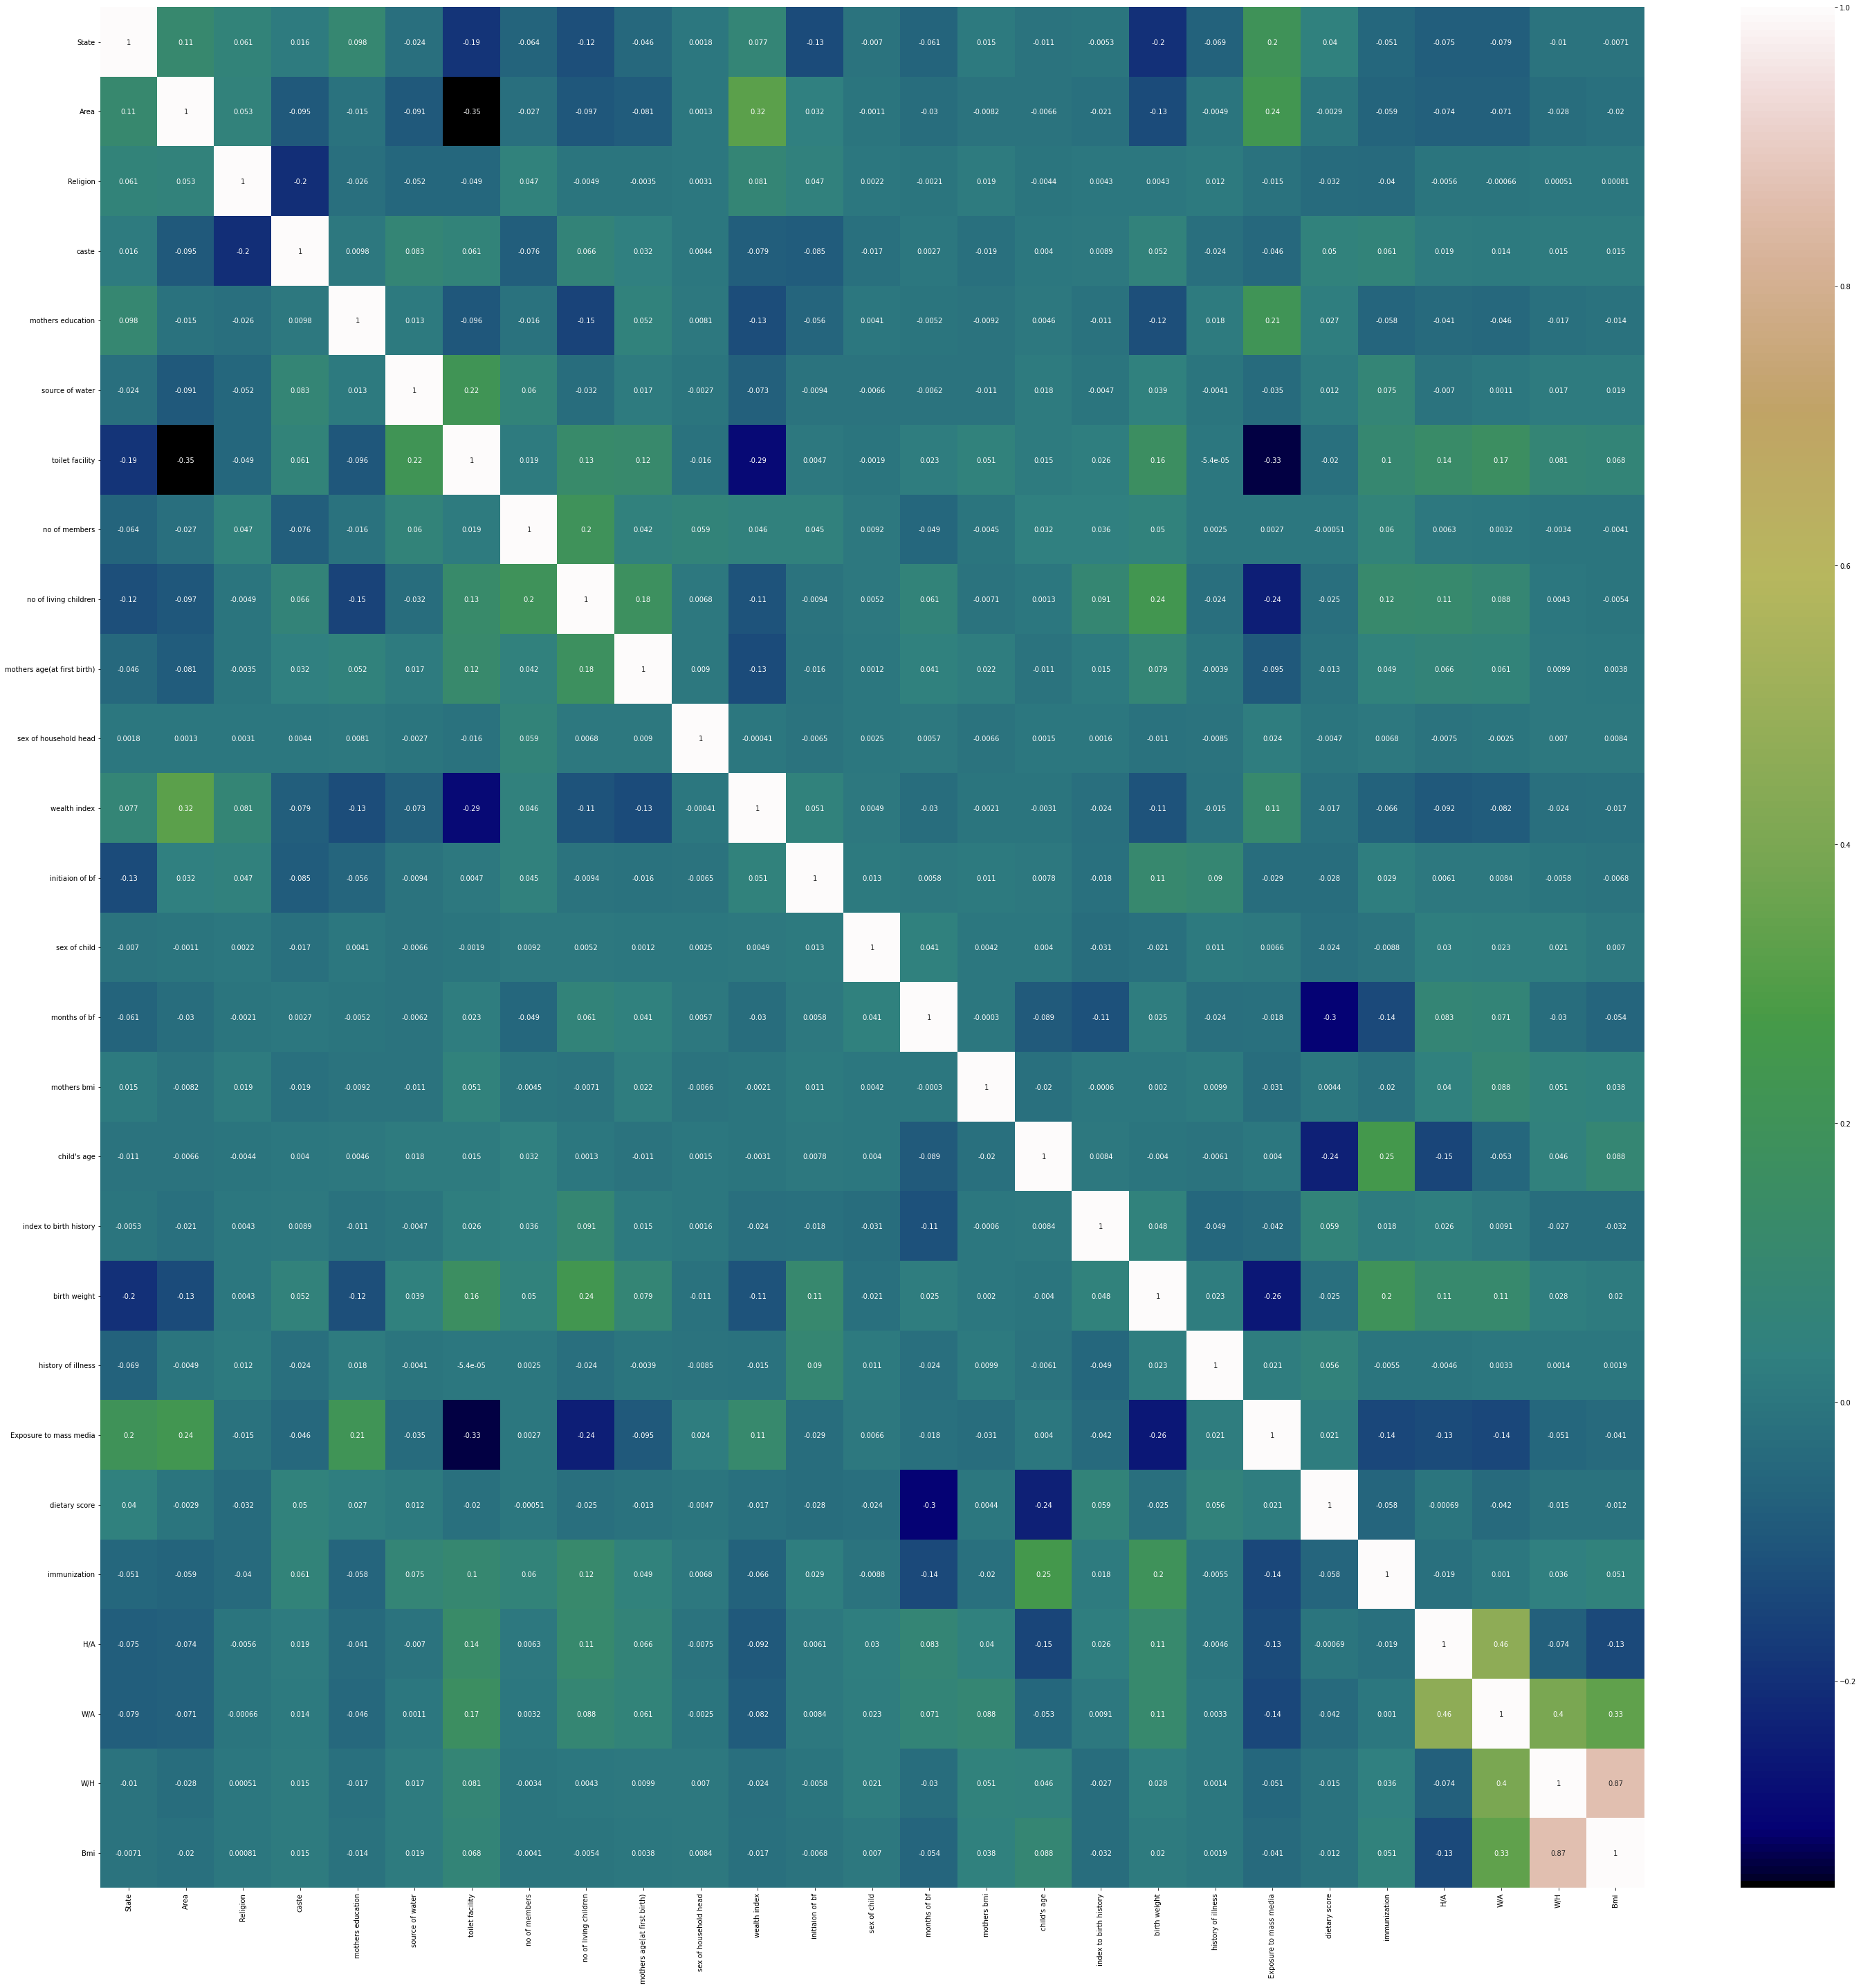

In [ ]:
corrmat = dfl.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
#plot heat map
g=sns.heatmap(dfl[top_corr_features].corr(),annot=True,cmap="gist_earth")
plt.show()

In [ ]:
X1, a, b, c, d= split_X_y(dfd)

(172622, 66) X shape
(172622, 1) y1 shape
(172622, 1) y2 shape
(172622, 1) y3 shape
(172622, 1) y4 shape


In [ ]:
pca_35 = PCA(n_components=35, random_state= 574)
pca_35.fit(X1)
print('variance explained by 35 components is' , sum(pca_35.explained_variance_ratio_*100))

variance explained by 35 components is 97.4708277855586


In [ ]:
pca_16 = PCA(n_components=16, random_state= 52)
pca_16.fit(X1)
print('variance explained by 16 components is' , sum(pca_16.explained_variance_ratio_*100))

variance explained by 16 components is 84.41649718995531


In [ ]:
np.cumsum(pca_16.explained_variance_ratio_*100)

array([23.99144279, 41.3528594 , 50.36942841, 58.18652437, 65.19133855,
       70.73804653, 75.70260918, 79.46916585, 82.90290367, 85.76521965,
       88.3313542 , 90.17427471, 91.87533056, 93.47667882, 94.77146713,
       95.78784132])

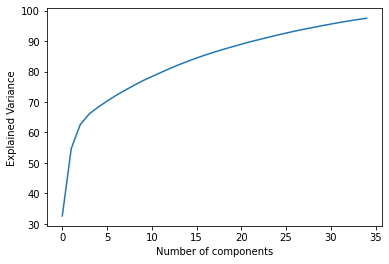

In [ ]:
plt.plot(np.cumsum(pca_35.explained_variance_ratio_*100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')
plt.savefig('elbow_plot.png', dpi = 100)

In [ ]:
pca_35.explained_variance_ratio_*100

array([32.63998829, 22.08949046,  7.80720531,  3.54286331,  2.21951406,
        1.99794337,  1.85348657,  1.68487711,  1.60869334,  1.5378173 ,
        1.35581754,  1.32798368,  1.29318691,  1.24729311,  1.12449801,
        1.09974098,  1.00790785,  0.94928985,  0.88745101,  0.85220776,
        0.82732733,  0.80677726,  0.72987062,  0.72490901,  0.71100402,
        0.6779572 ,  0.65777084,  0.60899433,  0.57446826,  0.56615048,
        0.55365432,  0.52483659,  0.49171809,  0.46228308,  0.42585054])

In [ ]:
# pca_n95 = PCA(n_components=0.95, random_state= 359)
# pca_n95.fit(X1)
X_pca_35 = pca_35.transform(X1)

In [ ]:
X_pca_35.shape

(172622, 35)

In [ ]:
X_pca_35

array([[-2.61158037e+00, -1.14478320e+00, -1.47052822e+00, ...,
        -6.49006755e-02, -9.86402847e-02,  1.67396018e-01],
       [-3.56507315e+00, -1.08811771e+00, -1.36642488e+00, ...,
        -7.83245694e-02, -3.17373608e-01,  1.52484672e-01],
       [-4.92396738e-01,  2.94761796e+00, -3.59906808e-01, ...,
         4.10959931e-01,  2.32731848e-01,  1.01292867e+00],
       ...,
       [-3.51920181e+00, -3.75021655e-02, -1.05970641e+00, ...,
         3.77160643e-02,  5.34568140e-01, -4.10821678e-01],
       [ 1.48266249e+00, -1.06343067e+00, -1.37371635e+00, ...,
         1.12645652e-01,  3.62588166e-01, -4.71498516e-01],
       [-2.46995707e+00, -1.08598004e+00, -5.59696659e-01, ...,
        -3.11740672e-03,  3.03465920e-01, -5.82432009e-01]])

In [ ]:
dfl = dfl.astype(float)
dfd = dfd.astype(float)

In [ ]:
df['religion'].hist(bins=20);

KeyError: ignored

# New Data For PCA

In [ ]:
df_pca = pd.DataFrame(X_pca_35, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 
                                           'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31',
                                           'PC32', 'PC33', 'PC34', 'PC35'])
df_pca['H/A'] = df['H/A']
df_pca['W/A'] = df['W/A']
df_pca['W/H'] = df['W/H']
df_pca['Bmi'] = df['Bmi']

In [ ]:
df_pca.shape

(172622, 39)

In [ ]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,H/A,W/A,W/H,Bmi
0,-2.611580,-1.144783,-1.470528,0.969800,0.606137,0.768696,0.547583,0.275222,0.179013,0.657300,0.032226,0.202547,-0.165528,1.105486,-0.069619,-0.185972,0.968950,0.298585,0.328417,-0.065105,-0.242451,0.353719,-0.367155,-0.285063,-0.123723,0.504882,-0.912571,-0.062560,0.501104,0.833035,0.466628,-0.071177,-0.064901,-0.098640,0.167396,0,0,0,0
1,-3.565073,-1.088118,-1.366425,0.895530,-0.085538,0.575861,1.412264,0.359849,-0.432639,-0.889223,-0.071501,0.128148,0.156355,-0.236750,0.325269,0.808102,-0.000131,-0.043368,-0.401620,0.565243,-0.744567,0.197913,-0.191749,0.651424,-0.413296,0.337386,-0.478640,-0.483349,0.481293,-0.370240,-0.551504,0.188669,-0.078325,-0.317374,0.152485,0,0,0,0
2,-0.492397,2.947618,-0.359907,0.547681,-0.507146,0.904731,-0.824846,-0.975701,0.360330,0.333163,-0.162173,-0.270162,0.102504,-0.094867,-0.373026,0.428541,0.360654,-0.204528,-0.425001,0.000454,-0.342128,-0.690766,0.171918,-0.278044,-0.316210,-0.000346,-0.454288,-0.332093,-0.091986,-0.062652,-0.123419,-0.773199,0.410960,0.232732,1.012929,0,0,0,0
3,-0.360977,1.951331,0.446607,1.042135,-0.231394,-0.480800,-0.820855,-1.128317,0.292953,0.184500,-0.384490,-0.124644,0.000632,-0.011302,-0.188105,0.414684,0.364858,-0.171795,-0.052087,0.204867,-0.434612,-0.164047,-0.402767,-0.192897,-0.547974,-0.304786,-0.114812,-0.341662,-0.671601,-0.278616,0.322586,0.407229,0.255125,0.622344,0.985223,0,0,0,0
4,-1.488282,-1.045526,-0.363541,0.632826,-0.354855,0.996954,-0.770848,-0.966754,0.411747,0.371617,-0.427957,-0.276346,0.172458,-0.100358,-0.288422,0.486905,0.627636,0.097641,-0.632533,0.772967,0.647063,-0.896012,0.295744,0.439298,-0.461127,-0.265369,-0.366271,-0.178662,-0.184990,-0.175782,-0.285806,-0.204727,0.175594,0.210913,0.807520,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172617,-2.587128,-1.067993,-1.551868,1.073562,-0.068456,0.690717,1.037673,-0.084058,-0.660513,-0.976732,-0.247205,0.212233,0.356224,0.233257,0.476265,-0.292857,-0.447795,-0.228484,-0.272400,0.197735,-0.275481,0.132747,0.167266,0.385376,-0.605646,-0.497083,0.365680,-0.674974,0.188618,-0.523908,-0.417951,0.185356,-0.053807,0.264696,-0.519750,0,0,0,0
172618,-2.456389,-1.075227,-0.547351,1.396536,0.001726,0.790723,-0.118933,0.983308,-0.909287,-1.064219,-0.396387,0.135411,0.216463,-0.151139,0.441397,-0.213155,0.225802,-0.405716,0.012989,0.045754,-0.234827,0.242815,0.040433,-0.281021,-0.145446,-0.577165,0.461591,-0.761063,0.459020,0.120048,0.498466,0.082305,-0.103374,0.189781,-0.319077,0,0,0,0
172619,-3.519202,-0.037502,-1.059706,-0.031369,-0.708769,-1.015254,-0.421201,1.807692,-0.304749,0.443301,-0.180103,0.141067,0.753136,-0.459536,-0.772020,0.782807,-0.016555,-0.272059,-0.623747,-0.030857,-0.402117,-0.211898,0.536058,-0.050196,-0.014333,-0.226305,-0.214988,0.327900,-0.192948,0.202505,0.008220,0.710423,0.037716,0.534568,-0.410822,0,0,0,0
172620,1.482662,-1.063431,-1.373716,-1.152617,-0.679769,-0.733039,-0.870806,0.892090,-0.141057,-0.069438,0.560967,-0.630224,-0.284574,-1.070378,0.712784,0.423546,0.461691,0.308443,-0.637653,-0.041122,-0.453291,0.895040,-0.300075,0.462483,0.337632,0.222474,0.164980,0.477074,0.671790,-0.491158,-0.008585,-0.431437,0.112646,0.362588,-0.471499,0,1,1,1


# Train Test Val Split

### Splitting for original algorithm

In [ ]:
Train, test = train_test_split(dfd, test_size=0.15, random_state = 13)
train, val = train_test_split(Train, test_size=0.15, random_state = 59)

In [ ]:
print(train.shape, ' is the shape of training data for NN')
print(Train.shape, ' is the shape of training data for ML algos')
print(test.shape, ' is the shape of testing data')
print(val.shape, ' is the shape of validation data')

(124718, 71)  is the shape of training data for NN
(146728, 71)  is the shape of training data for ML algos
(25894, 71)  is the shape of testing data
(22010, 71)  is the shape of validation data


In [ ]:
X_Train, y1_Train, y2_Train, y3_Train, y4_Train, y5_Train = split_X_y(Train)

(146728, 66) X shape
(146728, 1) y1 shape
(146728, 1) y2 shape
(146728, 1) y3 shape
(146728, 1) y4 shape
(146728,) y5 shape


In [ ]:
X_test, y1_test, y2_test, y3_test, y4_test, y5_test= split_X_y(test)

(25894, 66) X shape
(25894, 1) y1 shape
(25894, 1) y2 shape
(25894, 1) y3 shape
(25894, 1) y4 shape
(25894,) y5 shape


In [ ]:
X_val, y1_val, y2_val, y3_val, y4_val, y5_val = split_X_y(val)

(22010, 66) X shape
(22010, 1) y1 shape
(22010, 1) y2 shape
(22010, 1) y3 shape
(22010, 1) y4 shape
(22010,) y5 shape


In [ ]:
X_train, y1_train, y2_train, y3_train, y4_train, y5_train = split_X_y(train)

(124718, 66) X shape
(124718, 1) y1 shape
(124718, 1) y2 shape
(124718, 1) y3 shape
(124718, 1) y4 shape
(124718,) y5 shape


In [ ]:
_X_Train = norm(X_Train)
_X_train = norm(X_train)
_X_val = norm(X_val)
_X_test = norm(X_test)

        no of members  ...  immunization_unimmunized
41164        0.102564  ...                       0.0
77080        0.282051  ...                       0.0
113182       0.102564  ...                       0.0
19321        0.153846  ...                       0.0
89910        0.205128  ...                       0.0

[5 rows x 66 columns]
        no of members  ...  immunization_unimmunized
89636        0.076923  ...                       0.0
93028        0.051282  ...                       0.0
114581       0.051282  ...                       0.0
119324       0.179487  ...                       0.0
123404       0.153846  ...                       0.0

[5 rows x 66 columns]
        no of members  ...  immunization_unimmunized
105569       0.090909  ...                       0.0
9427         0.121212  ...                       1.0
151278       0.151515  ...                       0.0
44109        0.151515  ...                       0.0
110016       0.151515  ...                       0.0


In [ ]:
y1_Train.shape

(146728, 1)

### Splitting for PCA

In [ ]:
Train_pca, test_pca = train_test_split(df_pca, test_size=0.2, random_state = 368)
train_pca, val_pca = train_test_split(Train_pca, test_size=0.15, random_state = 40)

In [ ]:
print(train_pca.shape, ' is the shape of training data for NN')
print(Train_pca.shape, ' is the shape of training data for ML algos')
print(test_pca.shape, ' is the shape of testing data')
print(val_pca.shape, ' is the shape of validation data')

(117382, 39)  is the shape of training data for NN
(138097, 39)  is the shape of training data for ML algos
(34525, 39)  is the shape of testing data
(20715, 39)  is the shape of validation data


In [ ]:
X_Train_pca, y1_Train_pca, y2_Train_pca, y3_Train_pca, y4_Train_pca = split_X_y(Train_pca)

(138097, 35) X shape
(138097, 1) y1 shape
(138097, 1) y2 shape
(138097, 1) y3 shape
(138097, 1) y4 shape


In [ ]:
X_test_pca, y1_test_pca, y2_test_pca, y3_test_pca, y4_test_pca = split_X_y(test_pca)

(34525, 35) X shape
(34525, 1) y1 shape
(34525, 1) y2 shape
(34525, 1) y3 shape
(34525, 1) y4 shape


In [ ]:
X_val_pca, y1_val_pca, y2_val_pca, y3_val_pca, y4_val_pca = split_X_y(val_pca)

(20715, 35) X shape
(20715, 1) y1 shape
(20715, 1) y2 shape
(20715, 1) y3 shape
(20715, 1) y4 shape


In [ ]:
X_train_pca, y1_train_pca, y2_train_pca, y3_train_pca, y4_train_pca = split_X_y(train_pca)

(117382, 35) X shape
(117382, 1) y1 shape
(117382, 1) y2 shape
(117382, 1) y3 shape
(117382, 1) y4 shape


In [ ]:
_X_Train_pca = norm(X_Train_pca)
_X_train_pca = norm(X_train_pca)
_X_val_pca = norm(X_val_pca)
_X_test_pca = norm(X_test_pca)

             PC1       PC2       PC3  ...      PC33      PC34      PC35
23984   0.077776  0.306875  0.224807  ...  0.789405  0.355764  0.358068
142207  0.028950  0.012898  0.311496  ...  0.565484  0.713290  0.641929
98089   0.111516  0.849711  0.471890  ...  0.267014  0.721452  0.719780
96394   0.113221  0.164843  0.455116  ...  0.437272  0.474025  0.353408
96557   0.054352  0.021948  0.304114  ...  0.432958  0.435409  0.419267

[5 rows x 35 columns]
            PC1       PC2       PC3  ...      PC33      PC34      PC35
42111  0.078489  0.236758  0.247048  ...  0.122200  0.376732  0.568470
13850  0.078121  0.035049  0.222749  ...  0.100487  0.532662  0.356791
42406  0.291009  0.026544  0.353944  ...  0.471960  0.429455  0.555122
6427   0.056056  0.025893  0.306620  ...  0.423529  0.537364  0.349056
34520  0.133475  0.095200  0.274923  ...  0.516709  0.357491  0.586257

[5 rows x 35 columns]
             PC1       PC2       PC3  ...      PC33      PC34      PC35
167310  0.090468  0.0226

# NN PCA

In [ ]:
def base_model_pca(inputs):
    x = tf.keras.layers.Dense(2048, activation= tf.nn.relu)(inputs)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(1024, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dense(512, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(256, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(256, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dense(128, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(128, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dense(64, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(64, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dense(32, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(16, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(8, activation= tf.nn.relu)(x)
    return x

In [ ]:
def final_model_pca(inputs):
    
    # get the base model
    x = base_model_pca(inputs)

    # connect the output Dense layer for classification. this will use a sigmoid activation.
    wa = Dense(units='2', activation='sigmoid', name = 'W/A')(x)
    ha = Dense(units='2', activation='sigmoid', name='H/A')(x)
    wh = Dense(units='2', activation='sigmoid', name='W/H')(x)
    bmi = Dense(units='2', activation='sigmoid', name='Bmi')(x)

    # define the model using the input and output layers
    model = Model(inputs=inputs, outputs=[wa, ha, wh, bmi])

    return model

In [ ]:
# inputs = tf.keras.layers.Input(shape=(25,))
inputs= Input(shape=(len(_X_train_pca.columns,)), name='inputs')
print(type(inputs))
adam = tf.keras.optimizers.Adam(learning_rate=0.0008)
model_pca = final_model_pca(inputs)

model_pca.compile(optimizer=adam, 
              loss = {'W/A' : 'binary_crossentropy',
                      'H/A' : 'binary_crossentropy',
                      'W/H' : 'binary_crossentropy',
                      'Bmi' : 'binary_crossentropy'
                     },
              metrics = {'W/A' : 'accuracy',
                         'H/A' : 'accuracy',
                         'W/H' : 'accuracy',
                         'Bmi' : 'accuracy'
                       }
             )

<class 'tensorflow.python.framework.ops.Tensor'>


In [ ]:
_X_train_pca_np = _X_train_pca.to_numpy()
_X_test_pca_np = _X_test_pca.to_numpy()
_X_Train_pca_np = _X_Train_pca.to_numpy()
_X_val_pca_np = _X_val_pca.to_numpy()

In [ ]:
y1_train_pca_oh = to_categorical(y1_train_pca, 2)
y2_train_pca_oh = to_categorical(y2_train_pca, 2)
y3_train_pca_oh = to_categorical(y3_train_pca, 2)
y4_train_pca_oh = to_categorical(y4_train_pca, 2)

In [ ]:
y1_val_pca_oh = to_categorical(y1_val_pca, 2)
y2_val_pca_oh = to_categorical(y2_val_pca, 2)
y3_val_pca_oh = to_categorical(y3_val_pca, 2)
y4_val_pca_oh = to_categorical(y4_val_pca, 2)

In [ ]:
model_pca.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 35)]         0                                            
__________________________________________________________________________________________________
dense_25 (Dense)                (None, 2048)         73728       inputs[0][0]                     
__________________________________________________________________________________________________
dropout_15 (Dropout)            (None, 2048)         0           dense_25[0][0]                   
__________________________________________________________________________________________________
dense_26 (Dense)                (None, 1024)         2098176     dropout_15[0][0]                 
____________________________________________________________________________________________

In [ ]:
# train the model for 2000 epochs
history_pca = model_pca.fit(_X_train_pca_np, [y1_train_pca_oh, y2_train_pca_oh, y3_train_pca_oh, y4_train_pca_oh], 
                    epochs=15, batch_size=64, 
                    validation_data=(_X_val_pca_np, [y1_val_pca_oh, y2_val_pca_oh, y3_val_pca_oh, y4_val_pca_oh]),
                    verbose=1)

Train on 117382 samples, validate on 20715 samples
Epoch 1/15
117312/117382 [============================>.] - ETA: 0s - loss: 2.3367 - W/A_loss: 0.6415 - H/A_loss: 0.6587 - W/H_loss: 0.5292 - Bmi_loss: 0.5073 - W/A_accuracy: 0.6465 - H/A_accuracy: 0.6277 - W/H_accuracy: 0.7812 - Bmi_accuracy: 0.8000

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


117382/117382 [==============================] - 38s 324us/sample - loss: 2.3366 - W/A_loss: 0.6415 - H/A_loss: 0.6586 - W/H_loss: 0.5295 - Bmi_loss: 0.5076 - W/A_accuracy: 0.6465 - H/A_accuracy: 0.6277 - W/H_accuracy: 0.7812 - Bmi_accuracy: 0.8000 - val_loss: 2.2841 - val_W/A_loss: 0.6219 - val_H/A_loss: 0.6480 - val_W/H_loss: 0.5197 - val_Bmi_loss: 0.4945 - val_W/A_accuracy: 0.6644 - val_H/A_accuracy: 0.6340 - val_W/H_accuracy: 0.7834 - val_Bmi_accuracy: 0.8035
Epoch 2/15
117382/117382 [==============================] - 37s 318us/sample - loss: 2.2694 - W/A_loss: 0.6124 - H/A_loss: 0.6420 - W/H_loss: 0.5181 - Bmi_loss: 0.4972 - W/A_accuracy: 0.6668 - H/A_accuracy: 0.6367 - W/H_accuracy: 0.7831 - Bmi_accuracy: 0.8005 - val_loss: 2.2423 - val_W/A_loss: 0.6012 - val_H/A_loss: 0.6338 - val_W/H_loss: 0.5159 - val_Bmi_loss: 0.4917 - val_W/A_accuracy: 0.6657 - val_H/A_accuracy: 0.6371 - val_W/H_accuracy: 0.7834 - val_Bmi_accuracy: 0.8035
Epoch 3/15
117382/117382 [===========================

KeyboardInterrupt: ignored

In [ ]:
pred1, pred2, pred3, pred4 = model_pca.predict(_X_test_pca_np)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [ ]:
y1_test_pca_np = y1_test_pca.to_numpy()
y2_test_pca_np = y2_test_pca.to_numpy()
y3_test_pca_np = y3_test_pca.to_numpy()
y4_test_pca_np = y4_test_pca.to_numpy()

In [ ]:
WA_accuracy = get_accuracy(pred1, y1_test_pca_np)

accuracy 0.6648805213613324


In [ ]:
HA_accuracy = get_accuracy(pred2, y2_test_pca_np)

accuracy 0.6435626357711803


In [ ]:
WA_accuracy = get_accuracy(pred3, y3_test_pca_np)

accuracy 0.7852860246198407


In [ ]:
Bmi_accuracy = get_accuracy(pred4, y4_test_pca_np)

accuracy 0.8028385228095583


In [ ]:
model_pca.save('/content/results/pca_nn1.h5')

# NN

In [ ]:
def base_model(inputs):
    x = tf.keras.layers.Dense(2048, activation= tf.nn.relu)(inputs)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(1024, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dense(512, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(256, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(256, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dense(128, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(128, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dense(64, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(64, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dense(32, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(16, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(8, activation= tf.nn.relu)(x)
    return x

In [ ]:
def final_model(inputs):
    
    # get the base model
    x = base_model(inputs)

    # connect the output Dense layer for classification. this will use a sigmoid activation.
    wa = Dense(units='2', activation='sigmoid', name = 'W/A')(x)
    ha = Dense(units='2', activation='sigmoid', name='H/A')(x)
    wh = Dense(units='2', activation='sigmoid', name='W/H')(x)
    bmi = Dense(units='2', activation='sigmoid', name='Bmi')(x)
    hawh = Dense(units='2', activation='sigmoid', name='HAWH')(x)
    # mal = Dense(units = '4', activation = 'softmax', name = 'Mal')(x)

    # define the model using the input and output layers
    model = Model(inputs=inputs, outputs=[wa, ha, wh, bmi, hawh])
    # model = Model(inputs = inputs, outputs = [mal])

    return model

In [ ]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [ ]:
# inputs = tf.keras.layers.Input(shape=(25,))
inputs= Input(shape=(len(_X_train.columns,)), name='inputs')
print(type(inputs))
adam = tf.keras.optimizers.Adam(learning_rate=0.0009)
model = final_model(inputs)

model.compile(optimizer=adam, 
              loss = {'W/A' : 'binary_crossentropy',
                      'H/A' : 'binary_crossentropy',
                      'W/H' : 'binary_crossentropy',
                      'Bmi' : 'binary_crossentropy',
                      'HAWH' : 'binary_crossentropy'
                     },
              metrics = {'W/A' : ['accuracy', tf.keras.metrics.AUC()],
                         'H/A' : ['accuracy', tf.keras.metrics.AUC()],
                         'W/H' : ['accuracy', tf.keras.metrics.AUC()],
                         'Bmi' : ['accuracy', tf.keras.metrics.AUC()],
                         'HAWH' : ['accuracy', tf.keras.metrics.AUC()]
                       }
             )
# model.compile(optimizer = adam, loss = {'Mal':'categorical_crossentropy'}, metrics = {'Mal':'accuracy'})

<class 'keras.engine.keras_tensor.KerasTensor'>


In [ ]:
_X_train_np = _X_train.to_numpy()
_X_test_np = _X_test.to_numpy()
_X_val_np = _X_val.to_numpy()

In [ ]:
y1_train_oh = to_categorical(y1_train, 2)
y2_train_oh = to_categorical(y2_train, 2)
y3_train_oh = to_categorical(y3_train, 2)
y4_train_oh = to_categorical(y4_train, 2)
y5_train_oh = to_categorical(y5_train, 2)
# y_train_oh = to_categorical(y_train, 4)

In [ ]:
y1_val_oh = to_categorical(y1_val, 2)
y2_val_oh = to_categorical(y2_val, 2)
y3_val_oh = to_categorical(y3_val, 2)
y4_val_oh = to_categorical(y4_val, 2)
y5_val_oh = to_categorical(y5_val, 2)
# y_val_oh = to_categorical(y_val, 4)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 66)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 2048)         137216      ['inputs[0][0]']                 
                                                                                                  
 dropout (Dropout)              (None, 2048)         0           ['dense[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 1024)         2098176     ['dropout[0][0]']                
                                                                                              

In [ ]:
checkpoint_filepath = '/content/results/basic_nn1.h5'

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_H/A_accuracy',
    mode='max',
    save_best_only=True)                                     

In [ ]:
# train the model for 2000 epochs
history = model.fit(_X_train_np, [y1_train_oh, y2_train_oh, y3_train_oh, y4_train_oh, y5_train_oh], 
                    epochs=20, batch_size=64, 
                    validation_data=(_X_val_np, [y1_val_oh, y2_val_oh, y3_val_oh, y4_val_oh, y5_val_oh]),
                    verbose=1)
# history = model.fit(_X_train_np, y_train_oh, epochs=100, batch_size=64, validation_data=(_X_val_np, y_val_oh), verbose=1)

Epoch 1/20
1949/1949 [==============================] - 51s 23ms/step - loss: 2.5939 - W/A_loss: 0.6181 - H/A_loss: 0.6437 - W/H_loss: 0.5321 - Bmi_loss: 0.5191 - HAWH_loss: 0.2809 - W/A_accuracy: 0.6676 - W/A_auc: 0.7189 - H/A_accuracy: 0.6386 - H/A_auc_1: 0.6802 - W/H_accuracy: 0.7843 - W/H_auc_2: 0.8041 - Bmi_accuracy: 0.7950 - Bmi_auc_3: 0.8136 - HAWH_accuracy: 0.9329 - HAWH_auc_4: 0.9474 - val_loss: 2.4459 - val_W/A_loss: 0.5892 - val_H/A_loss: 0.6280 - val_W/H_loss: 0.5145 - val_Bmi_loss: 0.4941 - val_HAWH_loss: 0.2201 - val_W/A_accuracy: 0.6848 - val_W/A_auc: 0.7546 - val_H/A_accuracy: 0.6401 - val_H/A_auc_1: 0.7061 - val_W/H_accuracy: 0.7839 - val_W/H_auc_2: 0.8126 - val_Bmi_accuracy: 0.8016 - val_Bmi_auc_3: 0.8218 - val_HAWH_accuracy: 0.9371 - val_HAWH_auc_4: 0.9607
Epoch 2/20
1949/1949 [==============================] - 44s 22ms/step - loss: 2.4602 - W/A_loss: 0.5971 - H/A_loss: 0.6255 - W/H_loss: 0.5162 - Bmi_loss: 0.4959 - HAWH_loss: 0.2254 - W/A_accuracy: 0.6776 - W/A_auc:

In [ ]:
predictions1, predictions2, predictions3, predictions4, predictions5 = model.predict(_X_test_np)
# predictions = model.predict(_X_test_np)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [ ]:
y1_test_np = y1_test.to_numpy()
y2_test_np = y2_test.to_numpy()
y3_test_np = y3_test.to_numpy()
y4_test_np = y4_test.to_numpy()
# y_test_np = y_test.to_numpy()

In [ ]:
WA_accuracy = get_accuracy(predictions1, y1_test_np)

accuracy 0.6817409438479957


In [ ]:
HA_accuracy = get_accuracy(predictions2, y2_test_np)

accuracy 0.6633583069436935


In [ ]:
WH_accuracy = get_accuracy(predictions3, y3_test_np)

accuracy 0.7796400710589326


In [ ]:
Bmi_accuracy = get_accuracy(predictions4, y4_test_np)

accuracy 0.7984475167992585


In [ ]:
# model.load_weights('/content/results/chi16_nn1.h5')

In [ ]:
model.save('/content/results/chi16_nn1.h5')

# Basic ML Algos

In [ ]:
import sklearn
from sklearn.feature_selection import RFE
# define the method
from sklearn.tree import DecisionTreeClassifier
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)
# fit the model
rfe.fit(_X_Train, y1_Train)
# transform the data
X, y = rfe.transform(_X_Train, y1_Train)

In [ ]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, _X_Train, y1_Train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

## KNN

In [ ]:
start = time.time()
knn = KNeighborsClassifier(n_neighbors = 50 ).fit(_X_Train, y1_Train) 
  
# accuracy on X_test 
accuracy = knn.score(_X_Test, y1_Test) 
end = time.time()
print(end-start, 'seconds')
print (f'Accuracy of Knn on variable y1 is {accuracy}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


12.371987104415894 seconds
Accuracy of Knn on variable y1 is 0.6513288377627925


In [ ]:
accuracy = []
for i in range(1,50):
  knn = KNeighborsClassifier(n_neighbors = i).fit(_X_Train, y1_Train) 
  knn_accuracy = knn.score(_X_Test, y1_Test)
  accuracy.append(knn_accuracy)
plt.plot(np.arange(1,50), accuracy, '-o')

## SVM

In [ ]:
start = time.time()
svm_model_linear = SVC(kernel = 'rbf', C = 25).fit(_X_Train, y1_Train) 
svm_predictions = svm_model_linear.predict(_X_Test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(_X_Test, y1_Test) 
end = time.time()
print(end - start, 'seconds')
print('accuracy of SVM is', accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


331.08939385414124 seconds
accuracy of SVM is 0.6296443210366257


In [ ]:
accuracy = []
for i in range(1,50):
  svm_model_linear = SVC(kernel = 'rbf', C = i).fit(_X_Train, y1_Train) 
  svm_predictions = svm_model_linear.predict(_X_Test) 
  svm_accuracy = svm_model_linear.score(_X_Test, y1_Test) 
  accuracy.append(svm_accuracy)
plt.plot(np.arange(1,50), accuracy, '-o')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: ignored

### Decision Tree

In [ ]:
start = time.time()
dtree_model = DecisionTreeClassifier(max_depth = 5).fit(_X_Train, y1_Train) 
dtree_predictions = dtree_model.predict(_X_Test)
end = time.time()
print(end - start, 'seconds') 
print(dtree_model.score(_X_Test, y1_Test))
  
# creating a confusion matrix 
cm = confusion_matrix(y1_Test, dtree_predictions)

0.07317614555358887 seconds
0.6480232711886817


In [ ]:
def relation_graph(max_depth):
  dtree_model = DecisionTreeClassifier(max_depth = max_depth).fit(_X_Train, y1_Train) 
  dtree_predictions = dtree_model.predict(_X_Test)
  dtree_accuracy = []
  count = 0
  for i,c in enumerate(y1_Test):
      if c == dtree_predictions[i]:
        dtree_accuracy.append(1)
        count += 1
      else:
        dtree_accuracy.append(0)
  print('decision_tree_accuracy', count/len(dtree_accuracy))
  return (count/len(dtree_accuracy))

In [ ]:
_X_Test.shape

(7563, 25)

decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
d

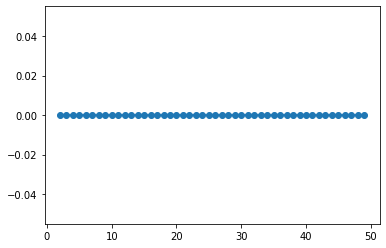

In [ ]:
accuracy= []
for i in range(2,50):
  a = relation_graph(i)
  accuracy.append(a)
plt.plot(np.arange(2,50,1), accuracy, '-o')

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(_X_Train,y1_Train)

#
y_pred=logreg.predict(_X_Test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import sklearn.metrics as metrics
# from sklearn.metrics import accuracy_score 
print("Accuracy:",metrics.accuracy_score(y1_Test, y_pred))

Accuracy: 0.6530477323813302
